In [13]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pkdarabi/bone-break-classification-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 28.4M/28.4M [00:00<00:00, 77.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pkdarabi/bone-break-classification-image-dataset/versions/4


In [17]:
"/root/.cache/kagglehub/datasets/pkdarabi/bone-break-classification-image-dataset/versions/4"

'/root/.cache/kagglehub/datasets/pkdarabi/bone-break-classification-image-dataset/versions/4'

In [18]:
IMG_SIZE=128
BATCH_SIZE=32

In [19]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [22]:
train_generator=train_datagen.flow_from_directory('/root/.cache/kagglehub/datasets/pkdarabi/bone-break-classification-image-dataset/versions/4/Bone Break Classification/Bone Break Classification',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  subset='training'
                                                  )

Found 907 images belonging to 10 classes.


In [23]:
val_generator=train_datagen.flow_from_directory('/root/.cache/kagglehub/datasets/pkdarabi/bone-break-classification-image-dataset/versions/4/Bone Break Classification/Bone Break Classification',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  subset='validation'
                                                  )

Found 222 images belonging to 10 classes.


In [24]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("Class indices:",class_indices)
print("class names:",class_names)


Class indices: {'Avulsion fracture': 0, 'Comminuted fracture': 1, 'Fracture Dislocation': 2, 'Greenstick fracture': 3, 'Hairline Fracture': 4, 'Impacted fracture': 5, 'Longitudinal fracture': 6, 'Oblique fracture': 7, 'Pathological fracture': 8, 'Spiral Fracture': 9}
class names: ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [28]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(len(class_names),activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2196 - loss: 2.2244 - val_accuracy: 0.1577 - val_loss: 2.3687
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.2854 - loss: 1.9540 - val_accuracy: 0.2297 - val_loss: 2.3486
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 1000ms/step - accuracy: 0.4152 - loss: 1.6689 - val_accuracy: 0.1712 - val_loss: 2.5688
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 995ms/step - accuracy: 0.5327 - loss: 1.4871 - val_accuracy: 0.1982 - val_loss: 3.2537
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6118 - loss: 1.1487 - val_accuracy: 0.2342 - val_loss: 3.6323
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 989ms/step - accuracy: 0.7165 - loss: 0.8591 - val_accuracy: 0.2432 - val_loss: 4.6041
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8125 - loss: 0.5825 - val_accuracy: 0.2523 - val_loss: 4.8032
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8698 - loss: 0.4183 - val_accuracy: 0.2523 -

In [32]:
model.save('BoneFracture.h5')

In [33]:
from google.colab import files
files.download('BoneFracture.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt#visualization
import numpy as np
model=load_model('BoneFracture.h5')
print("Model loaded")

Model loaded


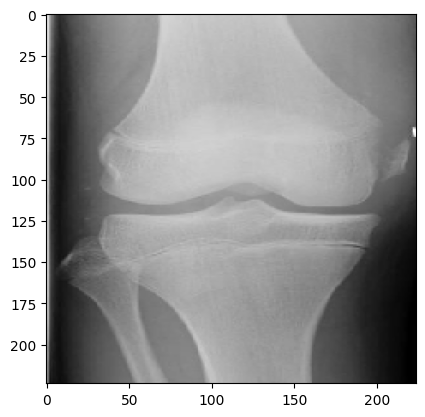

In [36]:
test_image_path="/root/.cache/kagglehub/datasets/pkdarabi/bone-break-classification-image-dataset/versions/4/Bone Break Classification/Bone Break Classification/Avulsion fracture/Test/13256_2019_2325_Fig1_HTML_png.rf.09368fddb2da3979a35a0cac6f45.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [37]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.

In [41]:
img_array = tf.image.resize(img_array, (IMG_SIZE, IMG_SIZE))
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
# The class_names list from the data generator was incorrect (only 1 class).
# Redefining class_names to match the model's expected 4 output classes.
# The `class_names` list is already correctly defined from the train_generator.
# We will use the globally defined `class_names` variable.
# class_names = ['Mild', 'Moderate', 'Non', 'Very mild'] # Assuming this order based on common Alzheimer's stages or Gradio interface.
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Avulsion fracture
